In [1]:
import pandas as pd

# Load the dataset
file_path = 'Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
data_info = data.info()
first_five_rows = data.head()

data_info, first_five_rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(None,
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV StreamingMovie

In [2]:
# Convert 'TotalCharges' to numeric and coerce errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Check for duplicate entries
duplicate_entries = data.duplicated().sum()

missing_values, duplicate_entries


(customerID           0
 gender               0
 SeniorCitizen        0
 Partner              0
 Dependents           0
 tenure               0
 PhoneService         0
 MultipleLines        0
 InternetService      0
 OnlineSecurity       0
 OnlineBackup         0
 DeviceProtection     0
 TechSupport          0
 StreamingTV          0
 StreamingMovies      0
 Contract             0
 PaperlessBilling     0
 PaymentMethod        0
 MonthlyCharges       0
 TotalCharges        11
 Churn                0
 dtype: int64,
 0)

In [4]:
# Remove rows with missing values
data_cleaned = data.dropna()

# Verify if the missing values are removed
remaining_missing_values = data_cleaned.isnull().sum().sum()

remaining_missing_values, data_cleaned.shape


(0, (7032, 21))

In [5]:
# Identify categorical columns (excluding 'customerID')
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('customerID')

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

# Display the shape and first few rows of the encoded dataset
encoded_shape = data_encoded.shape
first_five_rows_encoded = data_encoded.head()

encoded_shape, first_five_rows_encoded


((7032, 32),
    customerID  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  \
 0  7590-VHVEG              0       1           29.85         29.85   
 1  5575-GNVDE              0      34           56.95       1889.50   
 2  3668-QPYBK              0       2           53.85        108.15   
 3  7795-CFOCW              0      45           42.30       1840.75   
 4  9237-HQITU              0       2           70.70        151.65   
 
    gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
 0            0            1               0                 0   
 1            1            0               0                 1   
 2            1            0               0                 1   
 3            1            0               0                 0   
 4            0            0               0                 1   
 
    MultipleLines_No phone service  ...  StreamingTV_Yes  \
 0                               1  ...                0   
 1                               0  ...  

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Columns to scale
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply Min-Max scaling
scaler = MinMaxScaler()
data_encoded[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])

# Display the first few rows after scaling
scaled_first_five_rows = data_encoded[columns_to_scale].head()
scaled_first_five_rows


,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


In [7]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = data_encoded.drop(['customerID', 'Churn_Yes'], axis=1)  # Excluding 'customerID' and target column 'Churn_Yes'
y = data_encoded['Churn_Yes']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shapes of the resulting datasets
train_shape = X_train.shape, y_train.shape
test_shape = X_test.shape, y_test.shape

train_shape, test_shape


(((5625, 30), (5625,)), ((1407, 30), (1407,)))

c:\Users\Timing\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Timing\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Timing\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Timing\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

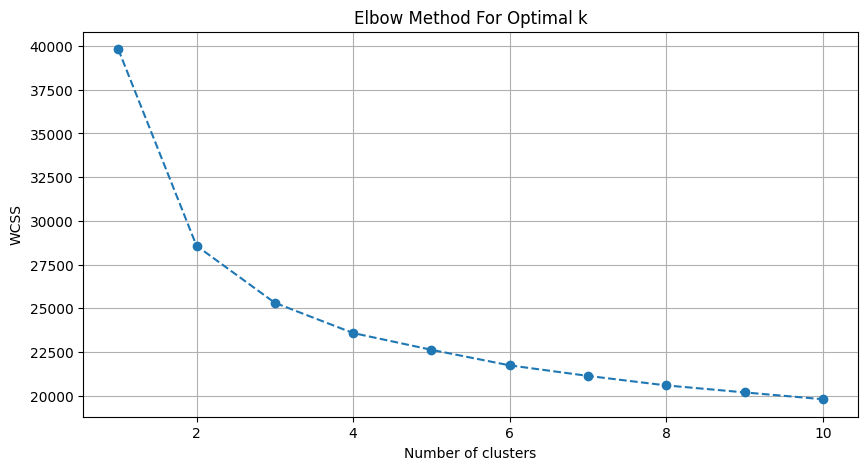

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt




X_clustering = data_encoded.drop('customerID', axis=1)

# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_clustering)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [9]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
X_clustering['Cluster'] = kmeans.fit_predict(X_clustering.drop('Churn_Yes', axis=1)) # Exclude target variable

# Check the first few entries of the dataset with the cluster assignments
data.head()


c:\Users\Timing\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
X_clustering['Cluster']

0       2
1       2
2       2
3       2
4       0
       ..
7038    3
7039    3
7040    2
7041    0
7042    3
Name: Cluster, Length: 7032, dtype: int32

In [14]:
# Re-importing the necessary libraries and loading the dataset
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('Telco-Customer-Churn.csv')

# Convert 'TotalCharges' to numeric, coerce errors to NaN and drop missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna()

# One-hot encode categorical variables (excluding 'customerID')
categorical_cols = data.select_dtypes(include=['object']).columns.drop('customerID')
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Apply Min-Max scaling to numerical columns
scaler = MinMaxScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Removing 'customerID' column as it is not useful for clustering
data = data.drop(columns='customerID')

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
data_clustered = data.drop('Churn_Yes', axis=1)  # Exclude the target variable for clustering
cluster_labels = kmeans.fit_predict(data_clustered)

# Calculate the centroids of each cluster
centroids = kmeans.cluster_centers_

# Create a dataframe for the centroids
centroids_df = pd.DataFrame(centroids, columns=data_clustered.columns)

# Scale the centroids back to the original scaling for better interpretation
centroids_df[numerical_cols] = scaler.inverse_transform(centroids_df[numerical_cols])

# Display the centroids of each cluster
centroids_df


c:\Users\Timing\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.302158,19.889209,84.429448,1741.141942,0.493046,0.341487,0.139089,1.000000,-1.387779e-17,0.552038,...,-3.885781e-16,4.503597e-01,-3.885781e-16,4.561151e-01,0.067146,0.006235,0.805755,0.106954,0.682014,0.078177
1,0.034211,30.667763,21.076283,665.220329,0.509211,0.482237,0.419079,1.000000,0.000000e+00,0.223684,...,1.000000e+00,4.996004e-16,1.000000e+00,3.330669e-16,0.238816,0.416447,0.292763,0.217763,0.080263,0.483553
2,0.100979,22.686047,50.671879,1181.392962,0.520808,0.363525,0.272950,0.636475,3.635251e-01,0.112607,...,-3.885781e-16,2.209302e-01,-3.885781e-16,2.301102e-01,0.227050,0.088739,0.514688,0.181151,0.279070,0.348225
3,0.164529,57.354713,91.908422,5289.657975,0.499721,0.755159,0.404908,0.952036,4.796431e-02,0.720580,...,-3.885781e-16,7.824875e-01,-3.885781e-16,7.830452e-01,0.333519,0.498606,0.670385,0.374233,0.203569,0.076408


c:\Users\Timing\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


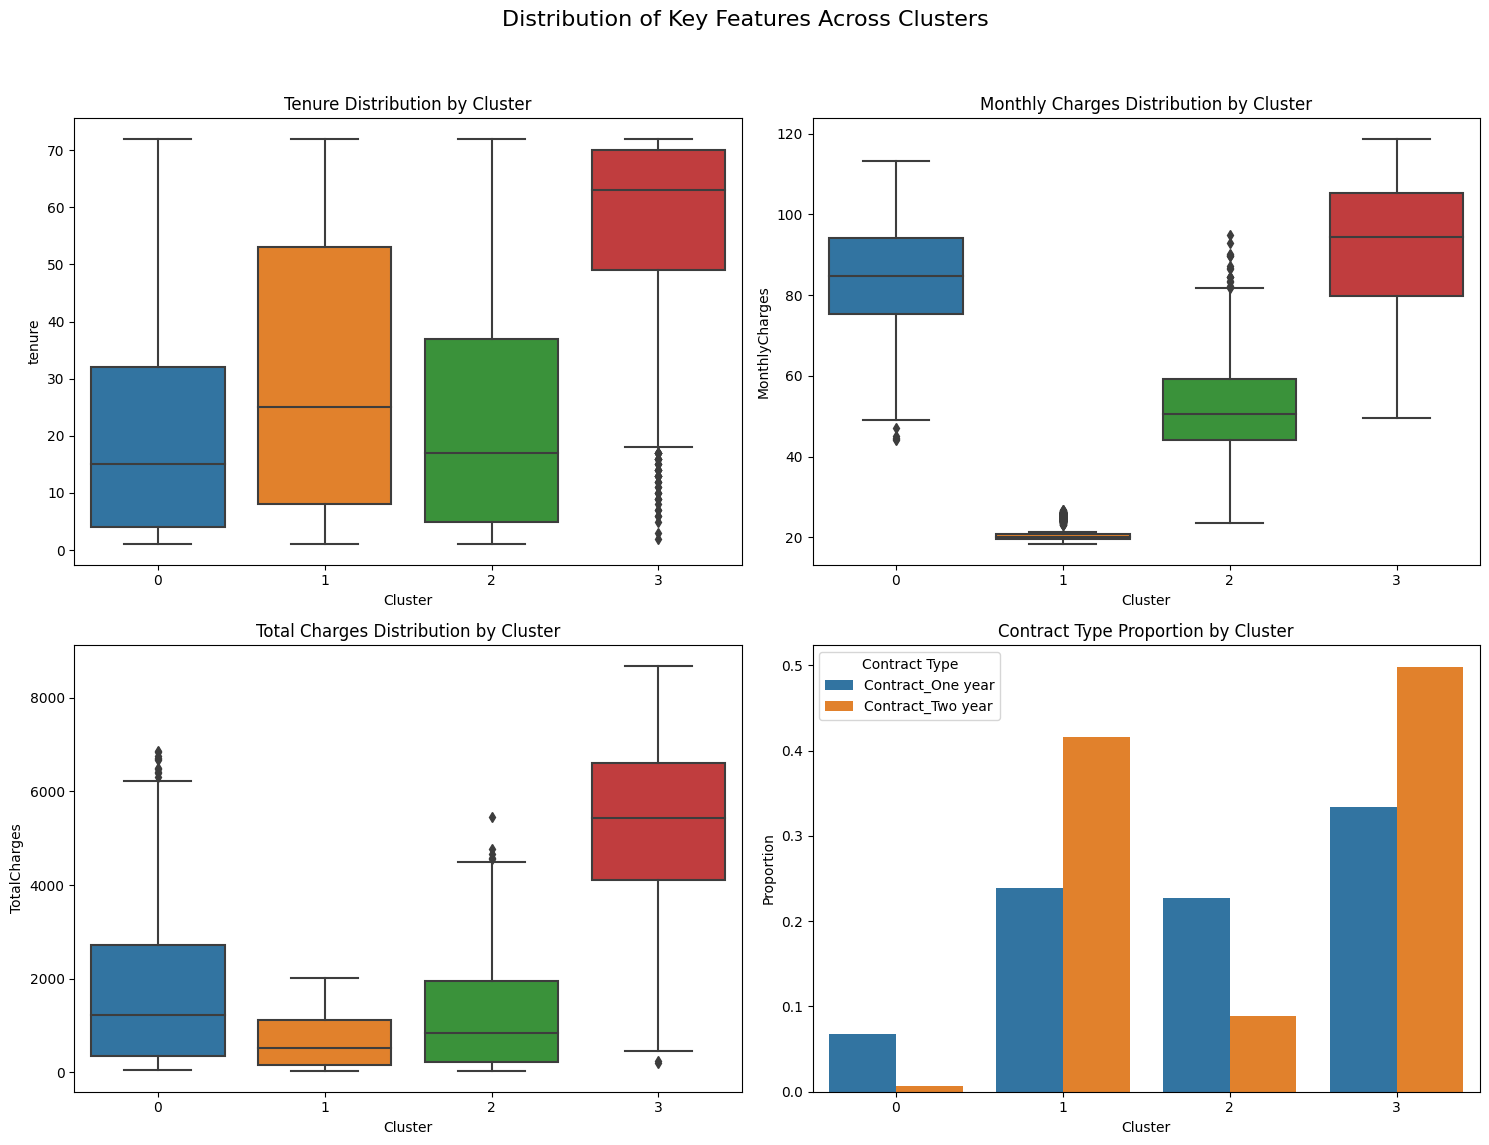

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Since the session was reset, we need to set up our environment again
# Re-load and process the dataset
data = pd.read_csv('Telco-Customer-Churn.csv')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna()
categorical_cols = data.select_dtypes(include=['object']).columns.drop('customerID')
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
scaler = MinMaxScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
data = data.drop(columns='customerID')

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
data_clustered = data.drop('Churn_Yes', axis=1)  # Exclude the target variable for clustering
data['Cluster'] = kmeans.fit_predict(data_clustered)

# Reverse the scaling of numerical columns for visualization purposes
data[numerical_cols] = scaler.inverse_transform(data[numerical_cols])

# Setting up the subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Features Across Clusters', fontsize=16)

# Plotting Tenure Distribution
sns.boxplot(ax=axes[0, 0], x='Cluster', y='tenure', data=data)
axes[0, 0].set_title('Tenure Distribution by Cluster')

# Plotting Monthly Charges Distribution
sns.boxplot(ax=axes[0, 1], x='Cluster', y='MonthlyCharges', data=data)
axes[0, 1].set_title('Monthly Charges Distribution by Cluster')

# Plotting Total Charges Distribution
sns.boxplot(ax=axes[1, 0], x='Cluster', y='TotalCharges', data=data)
axes[1, 0].set_title('Total Charges Distribution by Cluster')

# Plotting Contract Type Proportion
contract_types = ['Contract_One year', 'Contract_Two year']
data_contracts = data.groupby('Cluster')[contract_types].mean().reset_index().melt(id_vars='Cluster')
sns.barplot(ax=axes[1, 1], x='Cluster', y='value', hue='variable', data=data_contracts)
axes[1, 1].set_title('Contract Type Proportion by Cluster')
axes[1, 1].set_ylabel('Proportion')
axes[1, 1].legend(title='Contract Type')

# Show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the subplots to fit the figure area.
plt.show()


In [16]:
from sklearn.metrics import silhouette_score

# Calculate the mean values for each cluster
cluster_profiles = data.groupby('Cluster').mean()

# Calculate the silhouette score for the current clustering
silhouette_avg = silhouette_score(data_clustered, data['Cluster'])

cluster_profiles, silhouette_avg


(         SeniorCitizen     tenure  MonthlyCharges  TotalCharges  gender_Male  \
 Cluster                                                                        
 0             0.302158  19.889209       84.429448   1741.141942     0.493046   
 1             0.034211  30.667763       21.076283    665.220329     0.509211   
 2             0.100979  22.686047       50.671879   1181.392962     0.520808   
 3             0.164529  57.354713       91.908422   5289.657975     0.499721   
 
          Partner_Yes  Dependents_Yes  PhoneService_Yes  \
 Cluster                                                  
 0           0.341487        0.139089          1.000000   
 1           0.482237        0.419079          1.000000   
 2           0.363525        0.272950          0.636475   
 3           0.755159        0.404908          0.952036   
 
          MultipleLines_No phone service  MultipleLines_Yes  ...  \
 Cluster                                                     ...   
 0                  

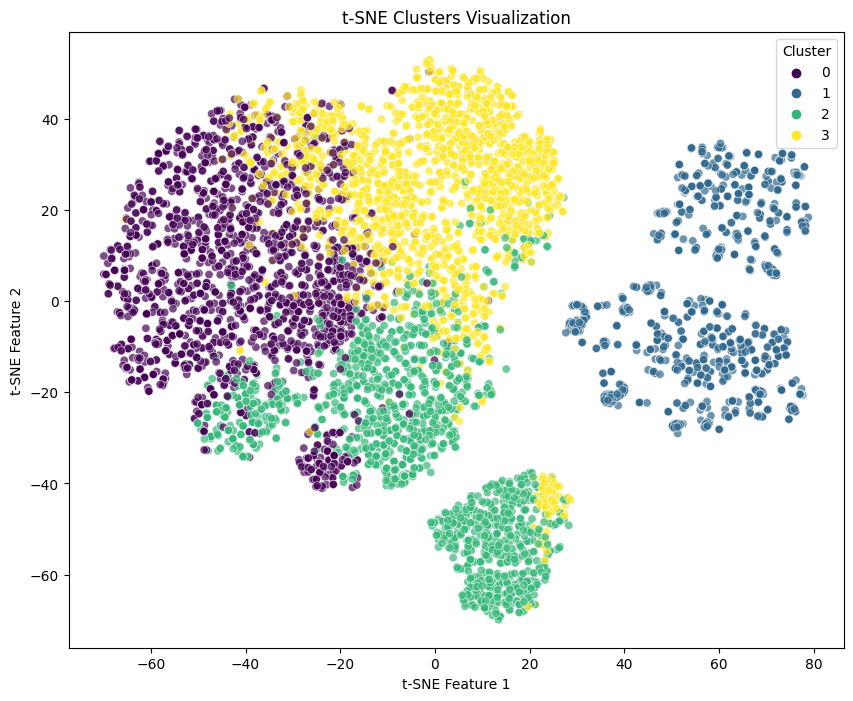

In [17]:
from sklearn.manifold import TSNE

cluster_labels_sample = data.loc[data_clustered.index, 'Cluster']

# Apply t-SNE to the same sample for visualization
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
tsne_results = tsne.fit_transform(data_clustered)

# Plot the t-SNE results with cluster coloring
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=cluster_labels_sample, palette='viridis', alpha=0.7)
plt.title('t-SNE Clusters Visualization')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend(title='Cluster')
plt.show()


In [18]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


# Feature scaling for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
svm_clf = SVC(kernel='linear')  # You can choose the kernel, for example, 'rbf' for non-linear problems

# Train the classifier
svm_clf.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = svm_clf.predict(X_test_scaled)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[918 115]
 [173 201]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.54      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

